# Simple AsymAE_infoGAN Auto Encoder with PADO, with and without original images
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: InfoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
* No constraints
* Adding a decomposition of the images by openings of decreasing sizes of openings by reconstruction

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.AsymAE_infoGAN import AsymAEinfoGAN
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print(x_small.shape)

(10, 28, 28, 1)


# 1. With PADO but no original images

In [20]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 6)

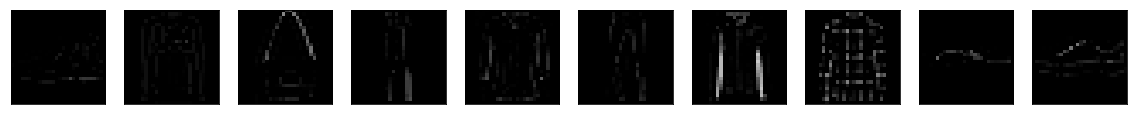

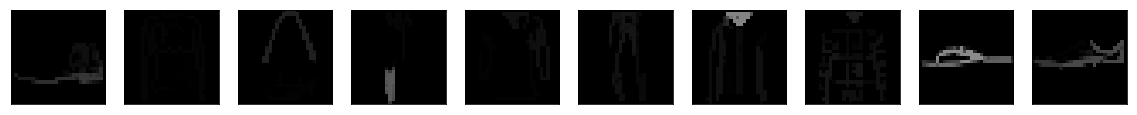

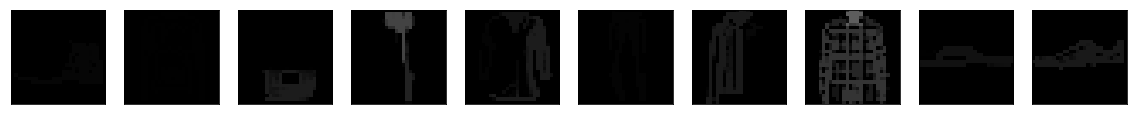

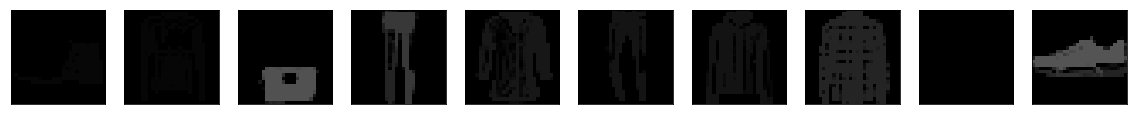

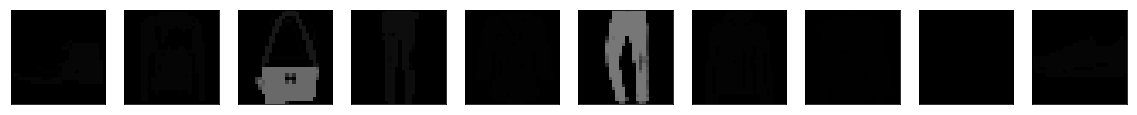

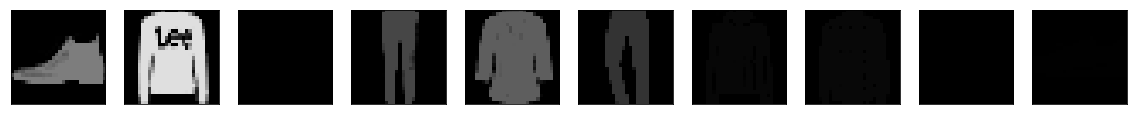

In [6]:
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=0)
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=1)
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=2)
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=3)
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=4)
bastien_utils.plot_all_images_2(x_small_PADO,channel_to_plot=5)

In [7]:
np.max(x_small_PADO[2,:,:,0])

0.5294117778539658

In [8]:
np.max(x_small_PADO[2,:,:,4])

0.4156862795352936

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

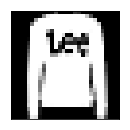

In [15]:
bastien_utils.plot_all_images(morphoMaths.OpenbyRec(x_small[1,:,:,0], SE=5).reshape(1,28,28,1))

In [18]:
results = pd.read_csv("../Results/AsymAE_infoGAN/SeveralChannels/WithPADO_NoOriginals/Simple/TestOutputs/18_09_13results")
results

,Unnamed: 0,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,100,0.00708,14.022849,13.964516,0.097836,0.006496,13.83174,13.843992,0.096159


Original images and reconstructions - Test MSE:  0.007080046147108078


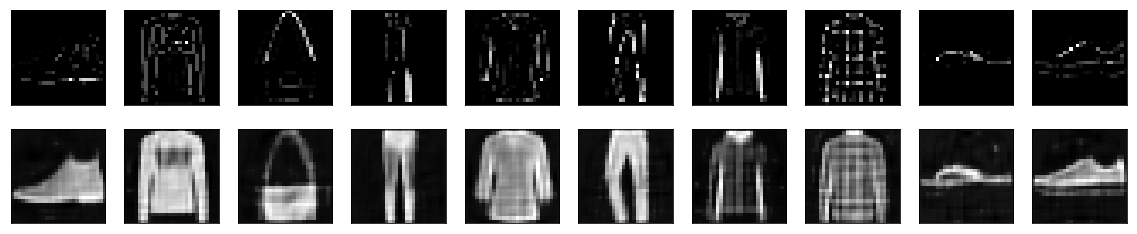

Histograms of encodings - Sparsity (Hoyer):  0.09783639758825302


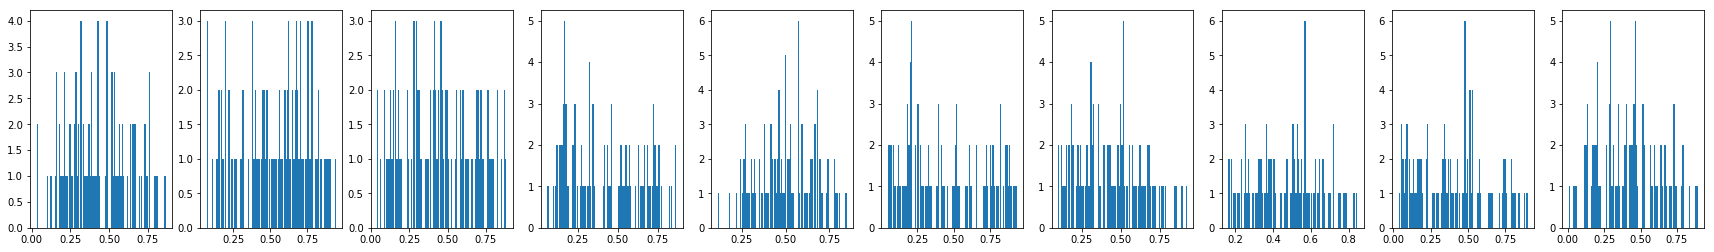

Atom images (weights of the encoder)


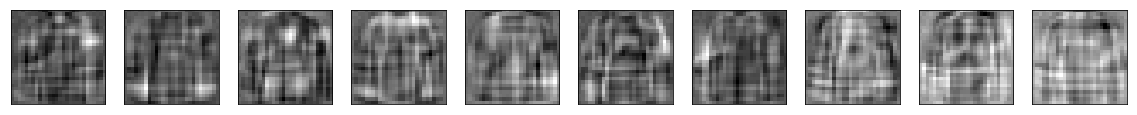

In [27]:
AE = AsymAEinfoGAN.load('18_09_13_dim100.h5', path_to_model_directory="../Results/AsymAE_infoGAN/SeveralChannels/WithPADO_NoOriginals/")
print('Original images and reconstructions - Test MSE: ', results['test_error'][0])
AE.plot_reconstructions(x_small_PADO, plot_input=True)
print('Histograms of encodings - Sparsity (Hoyer): ', results['test_sparsity'][0])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images (weights of the encoder)')
AE.plot_atoms_decoder(nb_to_plot=10)

In [28]:
w = AE.encoder.get_weights()[0]

In [31]:
w.shape

(4, 4, 6, 64)

(array([  2.,   7.,  86., 220., 251., 290., 133.,  27.,   7.,   1.]),
 array([-0.14961816, -0.11746358, -0.08530901, -0.05315442, -0.02099985,
         0.01115473,  0.04330931,  0.07546389,  0.10761847,  0.13977306,
         0.17192763], dtype=float32),
 <a list of 10 Patch objects>)

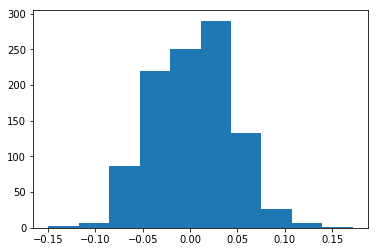

In [29]:
plt.hist(w[:,:,0,:].flatten())

(array([  5.,  11.,  70., 220., 263., 241., 170.,  33.,  10.,   1.]),
 array([-0.16186751, -0.12909974, -0.09633198, -0.06356421, -0.03079644,
         0.00197133,  0.0347391 ,  0.06750686,  0.10027463,  0.1330424 ,
         0.16581017], dtype=float32),
 <a list of 10 Patch objects>)

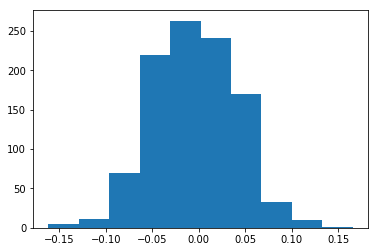

In [30]:
plt.hist(w[:,:,5,:].flatten())

In [ ]:
AE.plot_reconstructions

Dilatation of original images


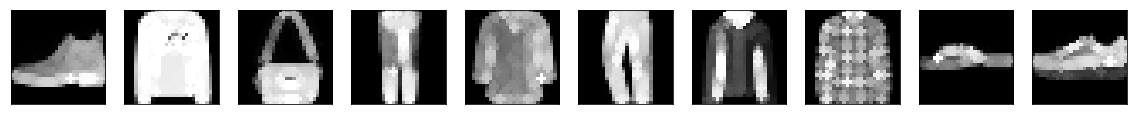

Dilatation of reconstructed images


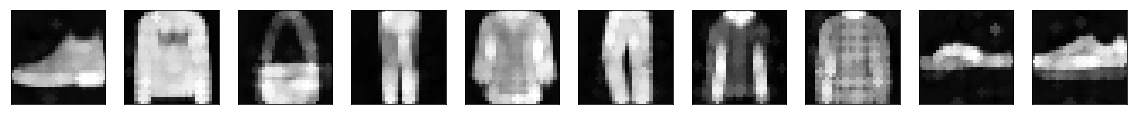

Max-approximation to dilatation
Max-approx error to original:  14.022849166870115  - Max-approx error to reconstruction:  13.964516104125973


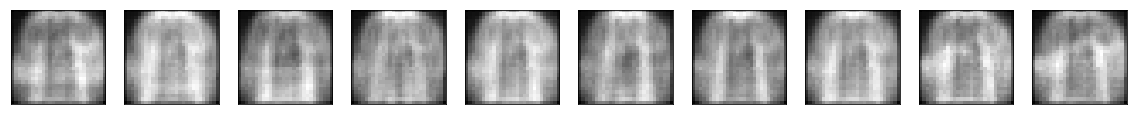

Dilatation of decoder weights


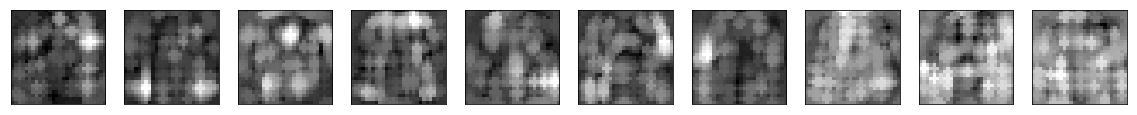

In [6]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Max-approximation to dilatation')
print('Max-approx error to original: ', results['test_max_approx_error_toOriginal_dilatation'][0], ' - Max-approx error to reconstruction: ', results['test_max_approx_error_toRec_dilatation'][0])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilatation of decoder weights')
AE_dil.plot_atoms_decoder(nb_to_plot=10)

In [7]:
AE.max_approximation_error(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False), morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(16.648773686218263, 13.651986798095702)

In [9]:
AE.best_linearSVM_classification_score(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=False), y_test, nb_values_C=30)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   0.9s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.1s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.1s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  7.9min finished


(0.804, 0.037735924528226404, {'C': 0.7880462815669912})

# 2. With PADO, and Original Images

In [11]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 7)

In [12]:
results = pd.read_csv("../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Simple/TestOutputs/18_09_24results")
results

,Unnamed: 0,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,100,0.006525,13.821777,13.893769,0.095001,0.006283,13.778758,13.863616,0.095198


Original images and reconstructions - Test MSE:  0.006524981512129307


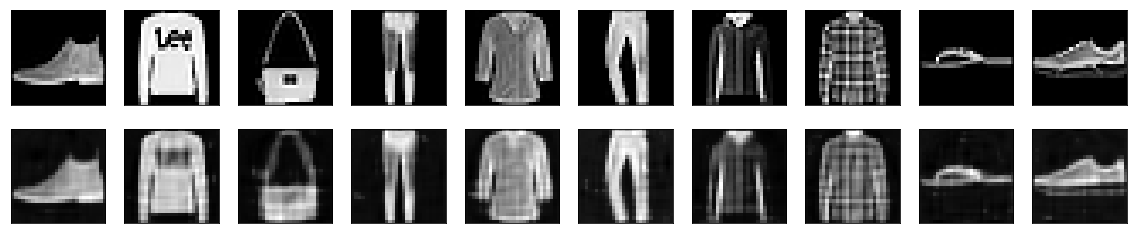

Histograms of encodings - Sparsity (Hoyer):  0.09500083327293396


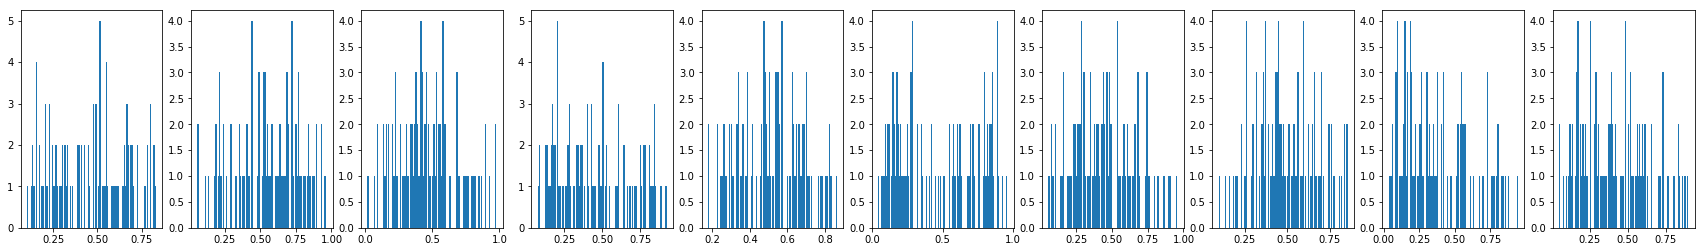

Atom images (weights of the encoder)


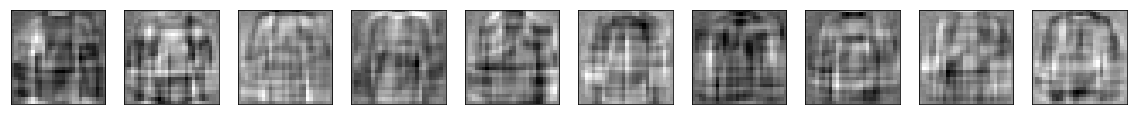

In [13]:
AE = AsymAEinfoGAN.load('18_09_24_dim100.h5', path_to_model_directory="../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/")
print('Original images and reconstructions - Test MSE: ', results['test_error'][0])
AE.plot_reconstructions(x_small_PADO, plot_input=True)
print('Histograms of encodings - Sparsity (Hoyer): ', results['test_sparsity'][0])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images (weights of the encoder)')
AE.plot_atoms_decoder(nb_to_plot=10)

In [14]:
w = AE.encoder.get_weights()[0]

(array([  2.,   7.,  35., 143., 272., 295., 170.,  70.,  24.,   6.]),
 array([-0.25942767, -0.21060792, -0.16178818, -0.11296843, -0.06414868,
        -0.01532894,  0.03349081,  0.08231056,  0.13113031,  0.17995004,
         0.2287698 ], dtype=float32),
 <a list of 10 Patch objects>)

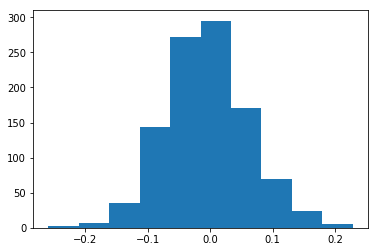

In [15]:
plt.hist(w[:,:,0,:].flatten())

(array([  9.,  43.,  95., 125., 163., 178., 172., 125.,  98.,  16.]),
 array([-0.08682299, -0.07042868, -0.05403438, -0.03764007, -0.02124577,
        -0.00485146,  0.01154285,  0.02793715,  0.04433146,  0.06072577,
         0.07712007], dtype=float32),
 <a list of 10 Patch objects>)

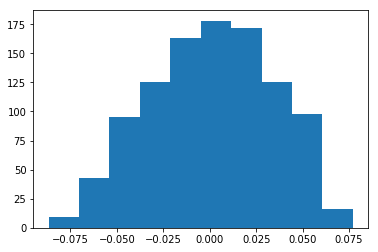

In [16]:
plt.hist(w[:,:,1,:].flatten())

(array([  7.,  18.,  70., 135., 203., 212., 189., 148.,  39.,   3.]),
 array([-0.10925348, -0.08916429, -0.06907511, -0.04898592, -0.02889673,
        -0.00880755,  0.01128164,  0.03137083,  0.05146001,  0.0715492 ,
         0.09163839], dtype=float32),
 <a list of 10 Patch objects>)

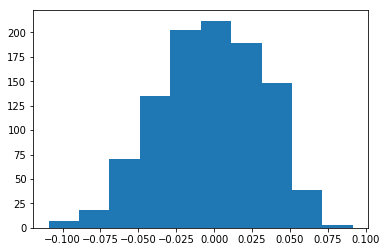

In [17]:
plt.hist(w[:,:,6,:].flatten())

Dilatation of original images


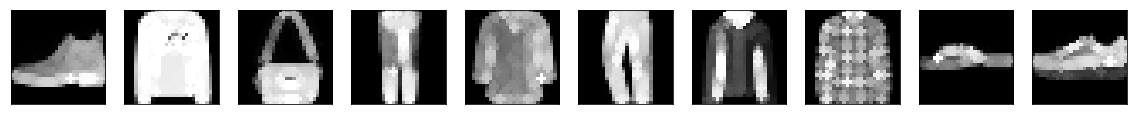

Dilatation of reconstructed images


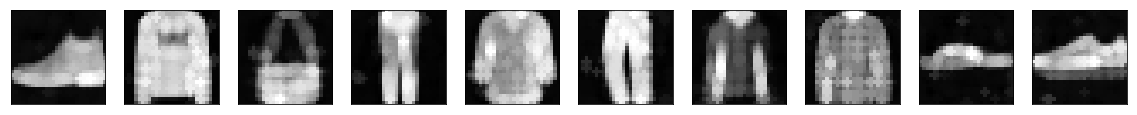

Max-approximation to dilatation
Max-approx error to original:  13.821777017211915  - Max-approx error to reconstruction:  13.89376946105957


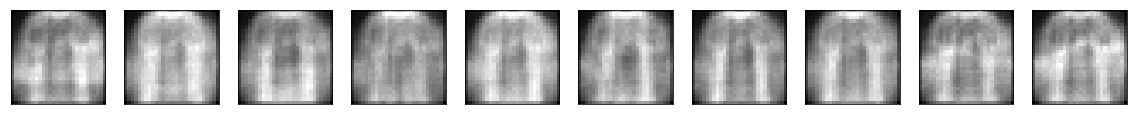

Dilatation of decoder weights


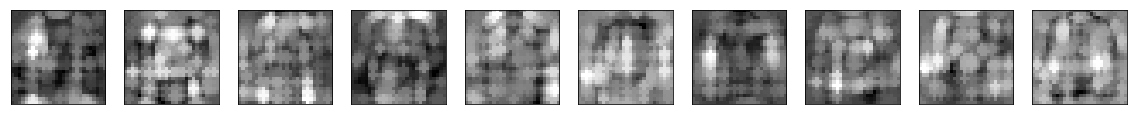

In [15]:
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Max-approximation to dilatation')
print('Max-approx error to original: ', results['test_max_approx_error_toOriginal_dilatation'][0], ' - Max-approx error to reconstruction: ', results['test_max_approx_error_toRec_dilatation'][0])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilatation of decoder weights')
AE_dil.plot_atoms_decoder(nb_to_plot=10)

In [16]:
AE.max_approximation_error(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True), morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(13.729595744323731, 13.839585095214844)

In [17]:
AE.best_linearSVM_classification_score(morphoMaths.positive_decomposition_by_openings_by_rec(x_test[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True), y_test, nb_values_C=30)

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.3s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.9s
[CV] C=0.01 ..........................................................
[CV] .

[CV] ............................ C=0.03290344562312668, total=   1.3s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.6s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.0s
[CV] C=0.04893900918477494 ...........................................
[CV] ............................ C=0.04893900918477494, total=   1.1s
[CV] C=0.04893900918477494 ...........................................
[CV] .

[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.16102620275609392 ...........................................
[CV] ............................ C=0.16102620275609392, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] ............................. C=0.2395026619987486, total=   1.0s
[CV] C=0.2395026619987486 ............................................
[CV] .

[CV] ............................. C=0.7880462815669912, total=   1.0s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.0s
[CV] C=0.7880462815669912 ............................................
[CV] ............................. C=0.7880462815669912, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] ............................. C=1.1721022975334805, total=   1.1s
[CV] C=1.1721022975334805 ............................................
[CV] .

[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=3.856620421163472 .............................................
[CV] .............................. C=3.856620421163472, total=   1.1s
[CV] C=5.736152510448681 .............................................
[CV] .

[CV] ............................. C=18.873918221350976, total=   1.5s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.3s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.2s
[CV] C=18.873918221350976 ............................................
[CV] ............................. C=18.873918221350976, total=   1.2s
[CV] C=18.873918221350976 ............................................
[CV] .

[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.2s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .............................. C=92.36708571873865, total=   1.1s
[CV] C=92.36708571873865 .............................................
[CV] .

[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] ............................... C=452.035365636025, total=   1.2s
[CV] C=452.035365636025 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  8.4min finished


(0.7736000000000002, 0.044441422119459686, {'C': 5.736152510448681})